# Linear Regression Project

**Amele Kouassi**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract


I created a linear regression model to predict the sale price of a house, given 79 independent variables. There were 40 numeric variables that I used in this project. I used 4 different groups of variables to create a linear regression model with. I was able to choose one of them that had an R^2 (coefficent of determination) of .79 when used on untrained data.

[Back to top](#Index)


## 1. Introduction


While starting my project I imported my data. I choose to created the predictive model by using 80 rows out of the 100 rows of data. I then chose all of the columns with numeric values, which were 40. I created a function to check the correlation coefficient between SalePrice and my other variables. I checked the coeficient of the top 8 independent variables and created scatter plots for them. I cleaned my data, then I experimented with 4 different groups of variables to see what their R^2 would be. I imported my untrained data. I then used the different groups of variables on my untrained data, and chose the group that had the highest R^2 as my final model. 

[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

##### Importing python libraries I will be using

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### This data shows the sale price for 100 different houses, and include 79 additional details about the house

In [63]:
data = pd.read_csv(r"C:\Users\18kou\Downloads\houseSmallData\houseSmallData.csv")

[Back to top](#Index)

### 2.2 Data Exploration

##### I am going to choose the number of rows that I will be using to explore my data, and create my linear regression. I chose 80 rows because I think that is a great number to use to train my linear regression

In [4]:
df = data.iloc[0:80,:]
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### I am going to choose which variables in the data are numeric data. 

In [5]:
numeric = df.select_dtypes(include = [np.number])
numeric.shape

(80, 40)

#####  I will be picking out the top 8 variables who are correlated with the sale price, which will be the independent variables that I use to create my linea regression, and also check their correlation coefficient.

In [6]:
corr = numeric.corr()
corr_coefficient = corr['SalePrice'].sort_values(ascending = False)[0:9]
corr_coefficient

SalePrice      1.000000
OverallQual    0.853355
GrLivArea      0.762034
GarageArea     0.712617
GarageCars     0.690945
YearBuilt      0.684769
TotalBsmtSF    0.650014
GarageYrBlt    0.627984
MasVnrArea     0.586789
Name: SalePrice, dtype: float64

##### Assigning an index to the variables

In [7]:
cols = corr['SalePrice'].sort_values(ascending = False)[0:9].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea'],
      dtype='object')

##### Selecting the variables for my x and y axis

In [8]:
x = df[cols]
y = df['SalePrice']

# I am dropping the 'SalePrice' from my x axis because it is the dependent y 
x = x.drop(['SalePrice'], axis = 1)


##### OverallQual: Rates the overall material and finish of the house. It has a positive correlation with the Sale Price. The higer the OverallQual, the higher the SalePrice


<function matplotlib.pyplot.show(close=None, block=None)>

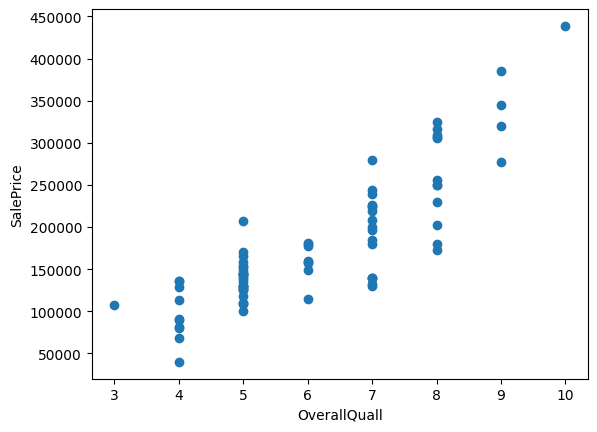

In [9]:
x = df['OverallQual']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('OverallQuall')
plt.show

##### GrLivArea: Above grade (ground) living area square feet. There is a positive correlation between GrLivArea and SalePrice

<function matplotlib.pyplot.show(close=None, block=None)>

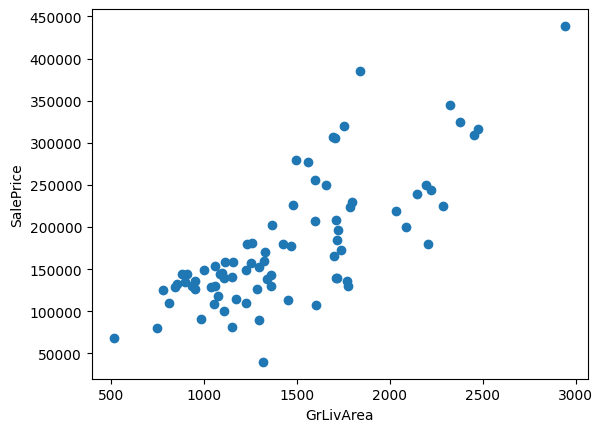

In [10]:
x = df['GrLivArea']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show

##### GarageArea: Size of the garage in square feet. The is a positive correlation between GarageArea and SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

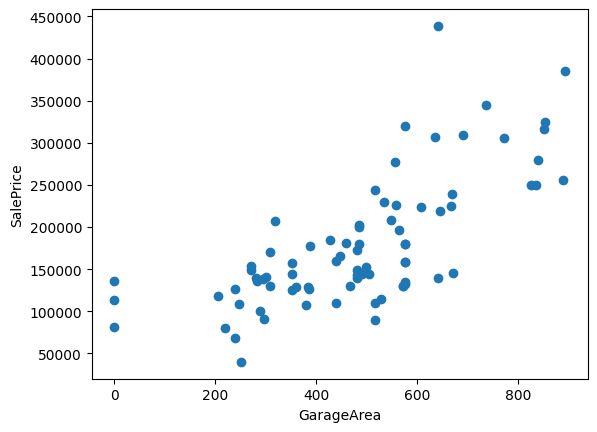

In [11]:
x = df['GarageArea']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show

##### GarageCars: Size of garage in car capacity. There is a positive correlation between GarageCars and SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

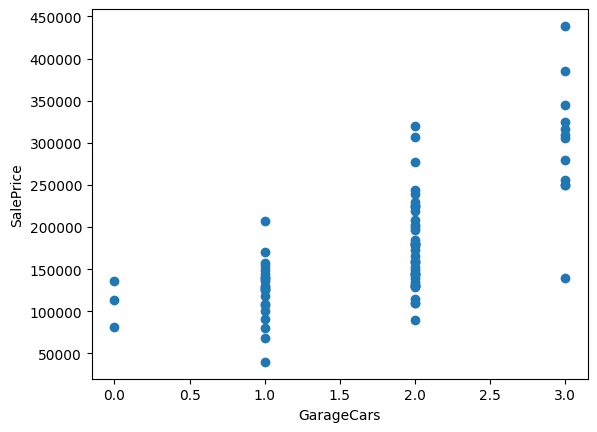

In [12]:
x = df['GarageCars']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show

##### YearBuilt: Original construction date. There is a Positive correlation between YearBuilt and SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

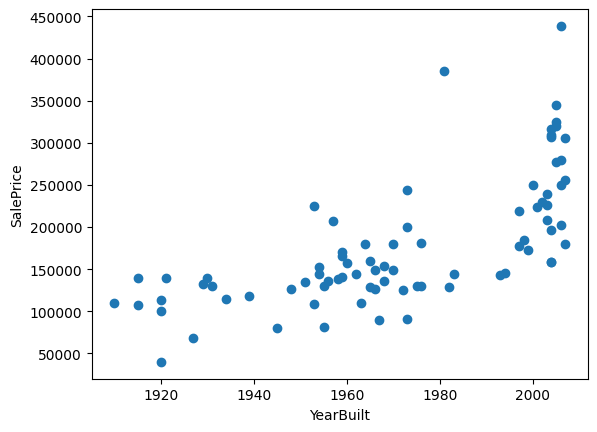

In [13]:
x = df['YearBuilt']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')
plt.show

##### TotalBsmtSF: Total square feet of basement area. There is a positive correlation between TotalBsmtSF and SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

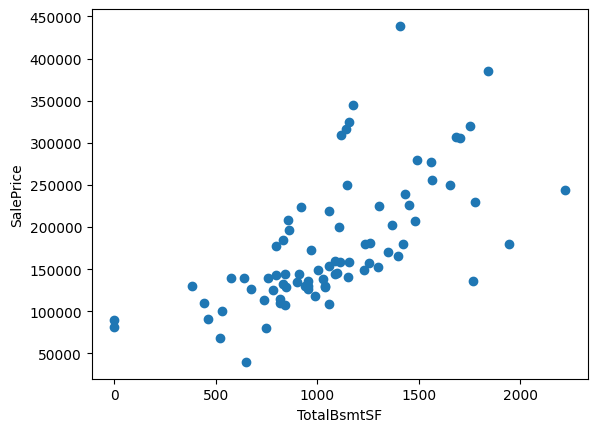

In [14]:
x = df['TotalBsmtSF']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show

##### GarageYrBlt: Year garage was built. There is a positive correlation between GarageYrBlt and SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

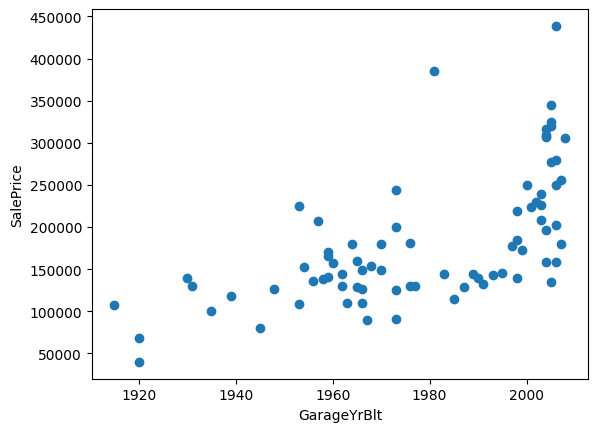

In [15]:
x = df['GarageYrBlt']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('GarageYrBlt')
plt.show

##### MasVnrArea: Masonry veneer area in square feet. It is not very obvious by looking at the graph but there is a positive correlation between the MasVnrArea and SalePrice. The correlation coefficient is .58. 

<function matplotlib.pyplot.show(close=None, block=None)>

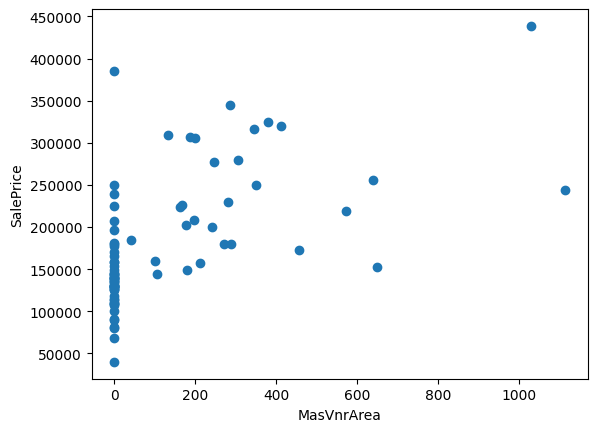

In [16]:
x = df['MasVnrArea']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('MasVnrArea')
plt.show

##### Since I could not see if the MasVnrArea had any correlation, I checked the next 2 descending variables to see if the variables from now on were  neutral. The next 2 variables showed a positive correlation, which confirmed that MasVnArea had a positive correlation, but it was harder to see it on the graph.

##### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms). There is a positive correlation between TotRmsAbvGrd and SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

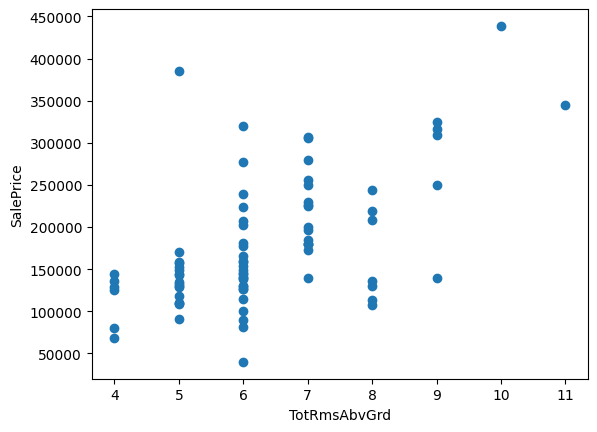

In [17]:
x = df['TotRmsAbvGrd']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.show

##### 1stFlrSF: First Floor square feet. There is a positive correlation between 1stFlSF and SalePrice

<function matplotlib.pyplot.show(close=None, block=None)>

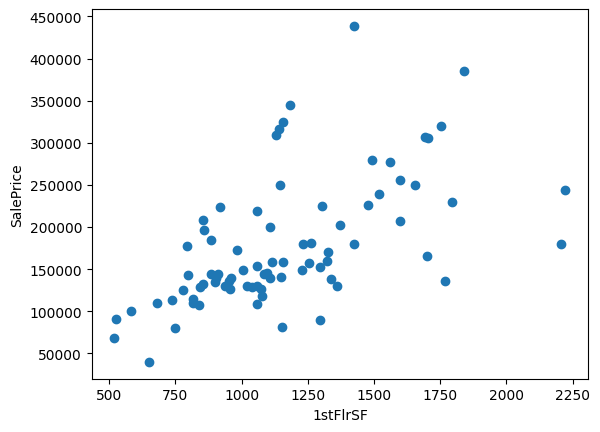

In [18]:
x = df['1stFlrSF']
plt.scatter(x, y)
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show

[Back to top](#Index)

### 2.3 Data Preparation

#####  I am going to see if there are missing values in our data, and clean it

In [24]:
# the below equation shows the columns that have null values
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)[0:80])

##### The function below is going to clean my data. Since I will only be using numeric data for my linear regression, I am going to select the numeric columns to clean by interpolating the rows that have missing values

In [25]:
data = df.select_dtypes(include = [np.number]).interpolate().dropna(axis=1)
data.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350,...,192,84,0,0,0,0,0,12,2008,250000


##### After cleaning the data, I am going to rerun the function to see which columns have the strongest correlation with sale price. The top variables are still the ones that I got when I 1st checked the correlation coefficient.

In [26]:
numeric = data.select_dtypes(include = [np.number])
numeric.head()
corr = numeric.corr()
corr_coefficient = corr['SalePrice'].sort_values(ascending = False)[0:9].index
corr_coefficient

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea'],
      dtype='object')

##### I am going to build my predictive model using the top 8 variables

In [27]:
cols = corr['SalePrice'].sort_values(ascending = False)[0:9].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea'],
      dtype='object')

In [28]:
x = data[cols]
y = x['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,MasVnrArea
0,7,1710,548,2,2003,856,2003.0,196
1,6,1262,460,2,1976,1262,1976.0,0
2,7,1786,608,2,2001,920,2001.0,162
3,7,1717,642,3,1915,756,1998.0,0
4,8,2198,836,3,2000,1145,2000.0,350
...,...,...,...,...,...,...,...,...
75,4,988,297,1,1973,462,1973.0,0
76,4,952,283,1,1956,952,1956.0,0
77,5,1285,240,1,1948,672,1948.0,0
78,4,1768,0,0,1968,1768,1957.0,0


##### Here is the function for the linear regression predictive model. I also check the R^2 score to see how good the variables that I have chosen are at predicting the SalePrice

In [29]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x, y)
predictions = model.predict(x)
print(f"R^2 is: {model.score(x, y)}")

R^2 is: 0.8609330575215991


(array([ 2.,  1.,  6., 16., 22., 18., 10.,  3.,  0.,  2.]),
 array([-80521.0860199 , -63361.54626384, -46202.00650778, -29042.46675172,
        -11882.92699565,   5276.61276041,  22436.15251647,  39595.69227253,
         56755.23202859,  73914.77178465,  91074.31154071]),
 <BarContainer object of 10 artists>)

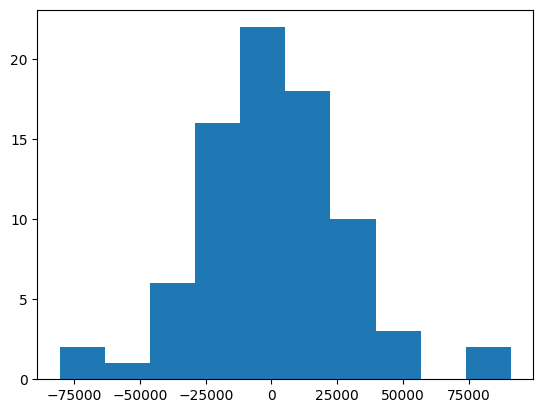

In [30]:
plt.hist(y - predictions)

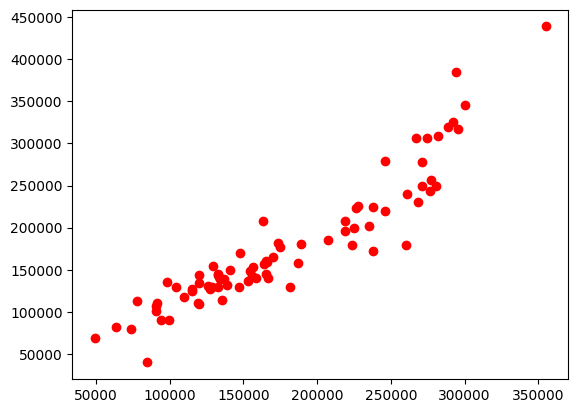

In [31]:
plt.scatter(predictions, y, color = 'r')

[Back to top](#Index)

### 2.4 Correlation


So far I have tested the first 8 indepent variables to see their correlation with the sale price. They all have a positive correlation with the Sale Price. The R^2 (Coefficient of Determination) is 86% when I text all of the 8 indenpendent variables together. The scatter plot shows a positive correlation between all 8 variables put together, and the SalePrice. One experiment is not enough to determine the best variables for the predictive model, so I will be testing other groups of variables.

I am going to test all of the variables that have a correlation coeficient of at least .50 and above whith the SalePrice. I want to see what the R^2 will be if I add more variables that have a positive correlation with the SalePrice. 

I will also check to see what the correlation coefficient and scatter plot will look like if I used the first 20 of the numeric variables.

I also will test all 39 independent numeric variable to see what will happends if I used all of the data to build my model. Will it be better at predictiong the Sale's Price?

In [33]:
cols = corr['SalePrice'].sort_values(ascending = False)[0:14].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd',
       '1stFlrSF', 'FullBath', 'YearRemodAdd', 'LotArea'],
      dtype='object')

In [34]:
x = data[cols]
y = x['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,1stFlrSF,FullBath,YearRemodAdd,LotArea
0,7,1710,548,2,2003,856,2003.0,196,8,856,2,2003,8450
1,6,1262,460,2,1976,1262,1976.0,0,6,1262,2,1976,9600
2,7,1786,608,2,2001,920,2001.0,162,6,920,2,2002,11250
3,7,1717,642,3,1915,756,1998.0,0,7,961,1,1970,9550
4,8,2198,836,3,2000,1145,2000.0,350,9,1145,2,2000,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,988,297,1,1973,462,1973.0,0,5,526,1,1973,1596
76,4,952,283,1,1956,952,1956.0,0,4,952,1,1956,8475
77,5,1285,240,1,1948,672,1948.0,0,6,1072,1,2001,8635
78,4,1768,0,0,1968,1768,1957.0,0,8,1768,2,1968,10778


In [35]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x, y)
predictions = model.predict(x)
print(f"R^2 is: {model.score(x, y)}")

R^2 is: 0.8841597390215643


(array([ 1.,  0.,  3., 10., 16., 17., 23.,  7.,  2.,  1.]),
 array([-89234.47015024, -72884.16095505, -56533.85175986, -40183.54256467,
        -23833.23336948,  -7482.92417429,   8867.3850209 ,  25217.69421609,
         41568.00341129,  57918.31260648,  74268.62180167]),
 <BarContainer object of 10 artists>)

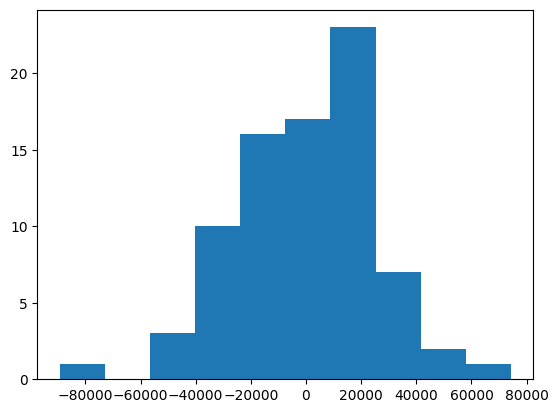

In [36]:
plt.hist(y - predictions)

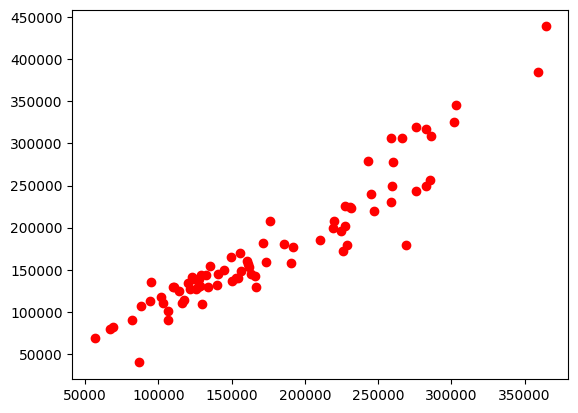

In [37]:
plt.scatter(predictions, y, color = 'r')

In [38]:
cols = corr['SalePrice'].sort_values(ascending = False)[0:21].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd',
       '1stFlrSF', 'FullBath', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotFrontage', 'MoSold',
       'BsmtUnfSF'],
      dtype='object')

In [39]:
x = data[cols]
y = x['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,1stFlrSF,FullBath,YearRemodAdd,LotArea,Fireplaces,WoodDeckSF,2ndFlrSF,HalfBath,LotFrontage,MoSold,BsmtUnfSF
0,7,1710,548,2,2003,856,2003.0,196,8,856,2,2003,8450,0,0,854,1,65.0,2,150
1,6,1262,460,2,1976,1262,1976.0,0,6,1262,2,1976,9600,1,298,0,0,80.0,5,284
2,7,1786,608,2,2001,920,2001.0,162,6,920,2,2002,11250,1,0,866,1,68.0,9,434
3,7,1717,642,3,1915,756,1998.0,0,7,961,1,1970,9550,1,0,756,0,60.0,2,540
4,8,2198,836,3,2000,1145,2000.0,350,9,1145,2,2000,14260,1,192,1053,1,84.0,12,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,988,297,1,1973,462,1973.0,0,5,526,1,1973,1596,0,120,462,0,21.0,11,0
76,4,952,283,1,1956,952,1956.0,0,4,952,1,1956,8475,0,0,0,0,35.5,4,724
77,5,1285,240,1,1948,672,1948.0,0,6,1072,1,2001,8635,0,0,213,0,50.0,1,295
78,4,1768,0,0,1968,1768,1957.0,0,8,1768,2,1968,10778,0,0,0,0,72.0,4,1768


In [40]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x, y)
predictions = model.predict(x)
print(f"R^2 is: {model.score(x, y)}")

R^2 is: 0.8921007798869878


(array([ 1.,  0.,  5., 11., 19., 23., 14.,  6.,  0.,  1.]),
 array([-86436.41445301, -69599.7831401 , -52763.1518272 , -35926.5205143 ,
        -19089.88920139,  -2253.25788849,  14583.37342441,  31420.00473732,
         48256.63605022,  65093.26736312,  81929.89867603]),
 <BarContainer object of 10 artists>)

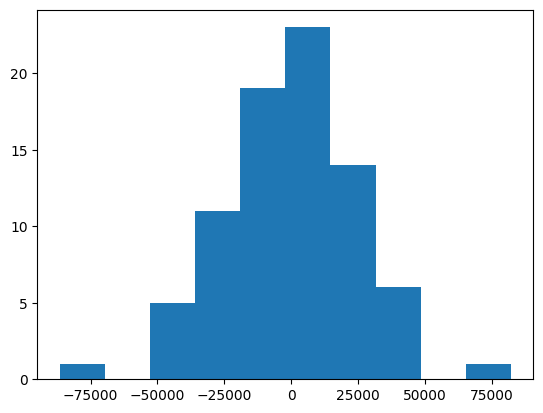

In [41]:
plt.hist(y - predictions)

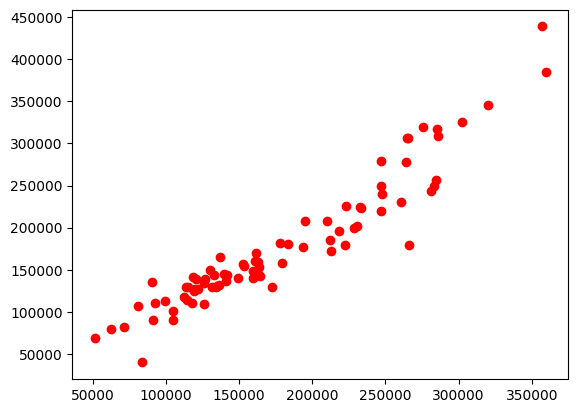

In [42]:
plt.scatter(predictions, y, color = 'r')

In [43]:
cols = corr['SalePrice'].sort_values(ascending = False)[0:40].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd',
       '1stFlrSF', 'FullBath', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotFrontage', 'MoSold',
       'BsmtUnfSF', 'BsmtFinSF1', 'OpenPorchSF', 'BedroomAbvGr',
       'BsmtFullBath', 'ScreenPorch', '3SsnPorch', 'BsmtHalfBath',
       'MSSubClass', 'LowQualFinSF', 'Id', 'Unnamed: 0', 'MiscVal',
       'BsmtFinSF2', 'EnclosedPorch', 'KitchenAbvGr', 'YrSold', 'OverallCond',
       'PoolArea'],
      dtype='object')

In [44]:
x = data[cols]
y = x['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,1stFlrSF,...,LowQualFinSF,Id,Unnamed: 0,MiscVal,BsmtFinSF2,EnclosedPorch,KitchenAbvGr,YrSold,OverallCond,PoolArea
0,7,1710,548,2,2003,856,2003.0,196,8,856,...,0,1,0,0,0,0,1,2008,5,0
1,6,1262,460,2,1976,1262,1976.0,0,6,1262,...,0,2,1,0,0,0,1,2007,8,0
2,7,1786,608,2,2001,920,2001.0,162,6,920,...,0,3,2,0,0,0,1,2008,5,0
3,7,1717,642,3,1915,756,1998.0,0,7,961,...,0,4,3,0,0,272,1,2006,5,0
4,8,2198,836,3,2000,1145,2000.0,350,9,1145,...,0,5,4,0,0,0,1,2008,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,988,297,1,1973,462,1973.0,0,5,526,...,0,76,75,0,0,0,1,2009,5,0
76,4,952,283,1,1956,952,1956.0,0,4,952,...,0,77,76,0,0,0,1,2008,7,0
77,5,1285,240,1,1948,672,1948.0,0,6,1072,...,0,78,77,0,41,0,1,2008,5,0
78,4,1768,0,0,1968,1768,1957.0,0,8,1768,...,0,79,78,0,0,0,2,2010,5,0


In [45]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x, y)
predictions = model.predict(x)
print(f"R^2 is: {model.score(x, y)}")

R^2 is: 0.9120850011556518


(array([ 1.,  1.,  3.,  7., 14., 19., 20.,  9.,  2.,  4.]),
 array([-72368.97509338, -59555.39375729, -46741.81242119, -33928.2310851 ,
        -21114.64974901,  -8301.06841292,   4512.51292318,  17326.09425927,
         30139.67559536,  42953.25693145,  55766.83826755]),
 <BarContainer object of 10 artists>)

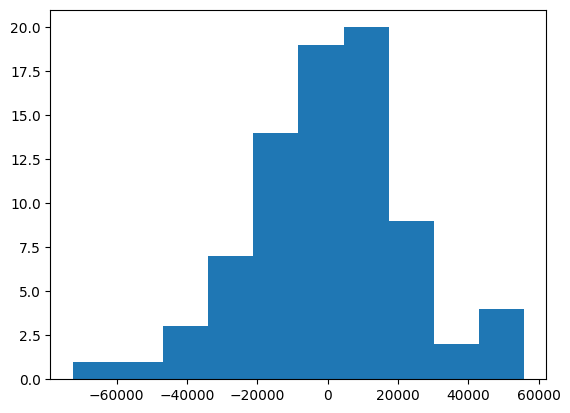

In [46]:
plt.hist(y - predictions)

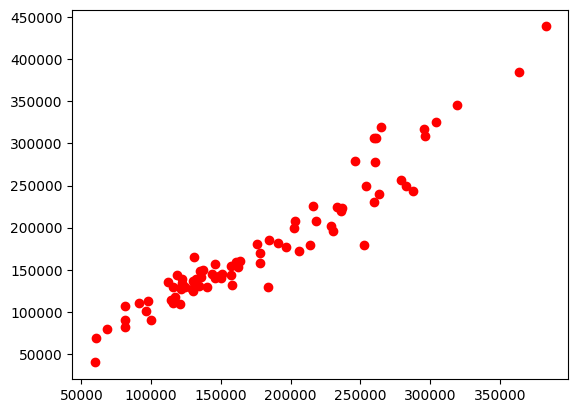

In [47]:
plt.scatter(predictions, y, color = 'r')

After using the different variables set ups that I explained I would be using above, I noticed that the more variables I used, the higher the R^2. I find that weird considereding the fact that most of the 39 independent variables don't have a strong negative or positive correlation with the SalePrice. Individually they are not good at predictiong the SalePrice, so I would expect my R^2 to decrease as I increased the number of variables I used. 


[Back to top](#Index)

## 3. Project Description

I initially thought that the more variables I used to create my model, the less effective it would be, but it looks like the more variables I use, the higher the R^2. With all of the variables that I selected, they had a positive correlation with SalePrice individually and colletively. Colletively, the variables' correlation coefficient with SalePrice was higher than the correlation coefficient of any of any of the variables individually. The correlation coefficient collectively is 86% and the largest correlation coefficient individually is 85% for OverallQual.

[Back to top](#Index)

### 3.1 Linear Regression

I used linear regression to build a model to predict the Sale Price of a house depending on multiple variables. In linear regression, independent variable (x) is used to predict the dependent variable (y). It starts by having data that already has y and x variables filled in. That data is then used to calculate the slope, which is the difference in lenght between two data points. The intercept is also calculated to see where the data croses the y-axis. Knowing the slop and y-intercept, they can be plugged into the equation y = mx + b, in order to predict the y given x. m is the slope and b is the y-intecept, x is the independent variable that will be used to predict the dependent variable y. 
This process can be done using python. 

* Import your data (training data)
* select how many rows of your data you will be using
* select all of the numeric variables
* Clean you data
* select the variables you want to use in your predictive model
* Calculate the R^2 of your data, this tells you what percentage of your depedent variable can be explained by all of the independent variables you are using
* Import the data that you have not worked with yet (untrained data)
* Check the R^2 of the untrained data using the independent variables you used in your trained data

[Back to top](#Index)

### 3.2 Analysis 

I analyzed 3 other variable set ups. 

* The 1st was looking at all the variables that individually had a correlation coefficient of .50 and above with the SalePrice. I used the code "cols = corr['SalePrice'].sort_values(ascending = False)[0:14].index
cols"

* The 2nd was analyzing the top 20 variables, using the code "cols = corr['SalePrice'].sort_values(ascending = False)[0:21].index
cols"

* the 3rd was analyzing all of the 39 independent variables, using the code "cols = corr['SalePrice'].sort_values(ascending = False)[0:40].index
cols" 

The R^2 of the 1st set up was .88, the 2nd .89, and the 3rd .91. So the more variables I used the higher the R^2, this made me think that the more variables I used to train my model, the better the model would be. So after these 3 analyses, I used all 39 independent variables to train my final model. 

[Back to top](#Index)

### 3.3 Results

The model that used all 39 independent variables performed better. 
* I selected all 40 numeric variables (cols = corr['SalePrice'].sort_values(ascending = False)[0:40].index cols")
  
* I chose my x and y 
    (x = data[cols]
    y = x['SalePrice']
    x = x.drop(['SalePrice'], axis = 1))
  
* I created a linea regression and checked the R^2
      (lr = linear_model.LinearRegression()
    model = lr.fit(x, y)
    predictions = model.predict(x)
    print(f"R^2 is: {model.score(x, y)}"))

I think this set up performed the best out of all of my setups because it gave the model more data to use in computing the SalePrice. 
I showed the plots and graphs for my 3 setups in 2.4. 

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Next, I tested all of the variable set ups that I had looked at previously, using the untrained data.

* 1st I used "cols = corr['SalePrice'].sort_values(ascending = False)[0:9].index". The R^2 after using these variables on the untrained data was .757
  
* 2nd I used "cols = corr['SalePrice'].sort_values(ascending = False)[0:14].index". The R^2 after using these variables on the untrained data was .753

* 3rd I used "cols = corr['SalePrice'].sort_values(ascending = False)[0:21].index". The R^2 after using these variables on the untrained data was .753

* 4th I used "cols = corr['SalePrice'].sort_values(ascending = False)[0:40].index". The R^2 after using these variables on the untrained data was .795

The 4th setup was the best at predicting the SalePrice for the untrained data, this is congruent with it having the best R^2 score when I created my linear regresion models. I think that this model simply had a lot of information when creating the predictive model, so it is better able to predict the Saleprice. 

In [48]:
cols = corr['SalePrice'].sort_values(ascending = False)[:40].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd',
       '1stFlrSF', 'FullBath', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotFrontage', 'MoSold',
       'BsmtUnfSF', 'BsmtFinSF1', 'OpenPorchSF', 'BedroomAbvGr',
       'BsmtFullBath', 'ScreenPorch', '3SsnPorch', 'BsmtHalfBath',
       'MSSubClass', 'LowQualFinSF', 'Id', 'Unnamed: 0', 'MiscVal',
       'BsmtFinSF2', 'EnclosedPorch', 'KitchenAbvGr', 'YrSold', 'OverallCond',
       'PoolArea'],
      dtype='object')

In [49]:
x = data[cols]
y = x['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,1stFlrSF,...,LowQualFinSF,Id,Unnamed: 0,MiscVal,BsmtFinSF2,EnclosedPorch,KitchenAbvGr,YrSold,OverallCond,PoolArea
0,7,1710,548,2,2003,856,2003.0,196,8,856,...,0,1,0,0,0,0,1,2008,5,0
1,6,1262,460,2,1976,1262,1976.0,0,6,1262,...,0,2,1,0,0,0,1,2007,8,0
2,7,1786,608,2,2001,920,2001.0,162,6,920,...,0,3,2,0,0,0,1,2008,5,0
3,7,1717,642,3,1915,756,1998.0,0,7,961,...,0,4,3,0,0,272,1,2006,5,0
4,8,2198,836,3,2000,1145,2000.0,350,9,1145,...,0,5,4,0,0,0,1,2008,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,988,297,1,1973,462,1973.0,0,5,526,...,0,76,75,0,0,0,1,2009,5,0
76,4,952,283,1,1956,952,1956.0,0,4,952,...,0,77,76,0,0,0,1,2008,7,0
77,5,1285,240,1,1948,672,1948.0,0,6,1072,...,0,78,77,0,41,0,1,2008,5,0
78,4,1768,0,0,1968,1768,1957.0,0,8,1768,...,0,79,78,0,0,0,2,2010,5,0


In [50]:
lr = linear_model.LinearRegression()
model = lr.fit(x, y)
predictions = model.predict(x)
print(f"R^2 is: {model.score(x, y)}")

R^2 is: 0.9120850011556518


(array([ 1.,  1.,  3.,  7., 14., 19., 20.,  9.,  2.,  4.]),
 array([-72368.97509338, -59555.39375729, -46741.81242119, -33928.2310851 ,
        -21114.64974901,  -8301.06841292,   4512.51292318,  17326.09425927,
         30139.67559536,  42953.25693145,  55766.83826755]),
 <BarContainer object of 10 artists>)

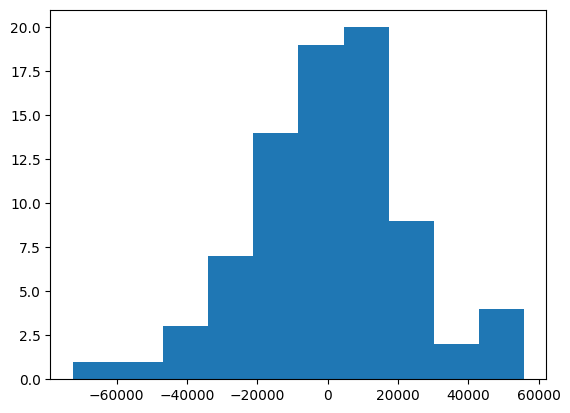

In [51]:
plt.hist(y - predictions)

Text(0, 0.5, 'SalePrice')

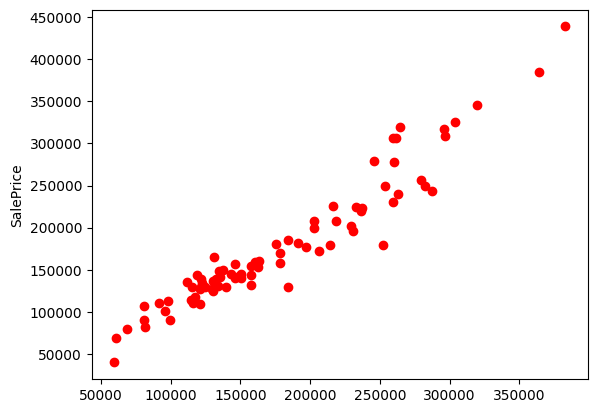

In [52]:
plt.scatter(predictions, y, color = 'r')
plt.ylabel("SalePrice")

In [53]:
test = pd.read_csv(r"C:\Users\18kou\Downloads\jtest\jtest.csv")
#test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [54]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [55]:
test = test.select_dtypes(include = [np.number]).interpolate().dropna(axis=0)
test.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1,101,102,60,77.0,9206,6,5,1985,1985,336,...,192,46,0,0,0,0,0,6,2010,178000
2,102,103,90,64.0,7018,5,5,1979,1979,0,...,0,0,0,0,0,0,0,6,2009,118964
3,103,104,20,94.0,10402,7,5,2009,2009,0,...,0,36,0,0,0,0,0,5,2010,198900
4,104,105,50,84.5,7758,7,4,1931,1950,600,...,0,0,0,0,184,0,0,6,2007,169500
5,105,106,60,75.0,9375,8,5,2003,2004,768,...,140,45,0,0,0,0,0,8,2008,250000


In [56]:
cols = corr['SalePrice'].sort_values(ascending = False)[0:40].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd',
       '1stFlrSF', 'FullBath', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotFrontage', 'MoSold',
       'BsmtUnfSF', 'BsmtFinSF1', 'OpenPorchSF', 'BedroomAbvGr',
       'BsmtFullBath', 'ScreenPorch', '3SsnPorch', 'BsmtHalfBath',
       'MSSubClass', 'LowQualFinSF', 'Id', 'Unnamed: 0', 'MiscVal',
       'BsmtFinSF2', 'EnclosedPorch', 'KitchenAbvGr', 'YrSold', 'OverallCond',
       'PoolArea'],
      dtype='object')

In [57]:
x = test[cols]
y = x['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,1stFlrSF,...,LowQualFinSF,Id,Unnamed: 0,MiscVal,BsmtFinSF2,EnclosedPorch,KitchenAbvGr,YrSold,OverallCond,PoolArea
1,6,1732,476,2,1985,741,1985.0,336,7,977,...,0,102,101,0,0,0,1,2010,5,0
2,5,1535,410,2,1979,0,1979.0,0,8,1535,...,0,103,102,0,0,0,2,2009,5,0
3,7,1226,740,3,2009,1226,2009.0,0,6,1226,...,0,104,103,0,0,0,1,2010,5,0
4,7,1818,240,1,1931,1040,1951.0,600,7,1226,...,0,105,104,0,0,0,1,2007,4,0
5,8,1992,648,2,2003,1053,2003.0,768,9,1053,...,0,106,105,0,0,0,1,2008,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1456,440,2,1976,855,1976.0,0,7,855,...,0,196,195,0,0,0,1,2009,6,0
96,7,1726,786,3,2007,1726,2007.0,205,8,1726,...,0,197,196,0,0,0,1,2007,5,0
97,8,3112,795,2,1918,1360,1918.0,0,8,1360,...,392,198,197,0,184,552,1,2006,4,512
98,6,2229,0,0,1912,755,1961.0,0,8,929,...,371,199,198,0,0,30,1,2009,6,0


In [58]:
print(y)

1     178000
2     118964
3     198900
4     169500
5     250000
       ...  
95    148500
96    311872
97    235000
98    104000
99    274900
Name: SalePrice, Length: 99, dtype: int64


In [59]:
predictions = model.predict(x)
print(f"R^2 is: {model.score(x, y)}")

R^2 is: 0.795151560583793


(array([ 3., 15., 24., 30., 14.,  7.,  1.,  2.,  1.,  2.]),
 array([-60935.39894563, -40108.80876434, -19282.21858304,   1544.37159825,
         22370.96177955,  43197.55196084,  64024.14214213,  84850.73232343,
        105677.32250472, 126503.91268602, 147330.50286731]),
 <BarContainer object of 10 artists>)

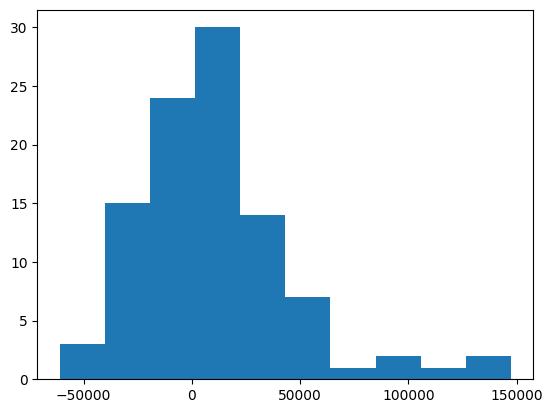

In [60]:
plt.hist(y - predictions)

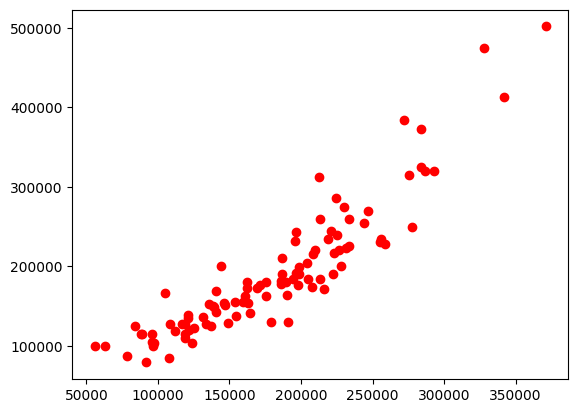

In [61]:
plt.scatter(predictions, y, color = 'r')

[Back to top](#Index)

## Conclusion

For this project I came to the conclusion that using all of my numeric data was best to predict my dependent variable. But I am still not sure if that is generally the best option when it comes to training a linear regression model. It seems too easy and erroneous to just choose all of your variables to build a predictive model. It worked for predicting the sale price of houses, but I am not sure if it will work for other predictive models. With the knowledge that I have of the prices of homes, every detail of a house affects its price, so I understand how using all of the variables to build the model resulted in the best model. But there are other depend variables in the real world, whith multiple independent variables, but not all of the independent variables affect the dependent variable. The most important thing that I learned while completing this project is to try multiple different variable set ups while creating a predictive model. I think it's also important to go into each predictive model project without a strong preconsived notion because although using all the variables was the best for this project, I don't think that it would be the best for other projects.


[Back to top](#Index
)
## References

Fernando, Jason. “R-Squared: Definition, Calculation Formula, Uses, and Limitations.” Investopedia, Investopedia, 2023.www.investopedia.com/terms/r/r-squared.asp.